In [46]:
import pandas as pd
import numpy as np

In [47]:
import pandas_datareader as pdr
key = "4412be54f9ecbfe7303a63f224bb63e7d0474e30"

In [48]:
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')

In [49]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-06-29 00:00:00+00:00,124.530,126.47,124.48,125.46,49161427,114.757309,116.545065,114.711233,115.614326,49161427,0.0,1.0
1,AAPL,2015-06-30 00:00:00+00:00,125.425,126.12,124.86,125.57,44370682,115.582073,116.222531,115.061412,115.715694,44370682,0.0,1.0
2,AAPL,2015-07-01 00:00:00+00:00,126.600,126.94,125.99,126.90,30238811,116.664863,116.978181,116.102733,116.941320,30238811,0.0,1.0
3,AAPL,2015-07-02 00:00:00+00:00,126.440,126.69,125.77,126.43,27210952,116.517419,116.747800,115.899998,116.508204,27210952,0.0,1.0
4,AAPL,2015-07-06 00:00:00+00:00,126.000,126.23,124.85,124.94,28060431,116.111949,116.323899,115.052197,115.135134,28060431,0.0,1.0


In [50]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2020-06-19 00:00:00+00:00,349.72,356.56,345.1500,354.635,66118952,349.72,356.56,345.1500,354.635,66118952,0.0,1.0
1254,AAPL,2020-06-22 00:00:00+00:00,358.87,359.46,351.1500,351.340,33861316,358.87,359.46,351.1500,351.340,33861316,0.0,1.0
1255,AAPL,2020-06-23 00:00:00+00:00,366.53,372.38,362.2701,364.000,53038869,366.53,372.38,362.2701,364.000,53038869,0.0,1.0
1256,AAPL,2020-06-24 00:00:00+00:00,360.06,368.79,358.5200,365.000,48155849,360.06,368.79,358.5200,365.000,48155849,0.0,1.0
1257,AAPL,2020-06-25 00:00:00+00:00,364.84,365.00,357.5700,360.700,34380628,364.84,365.00,357.5700,360.700,34380628,0.0,1.0


In [51]:
df.head(1)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-06-29 00:00:00+00:00,124.53,126.47,124.48,125.46,49161427,114.757309,116.545065,114.711233,115.614326,49161427,0.0,1.0


In [52]:
df.tail(100)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1158,AAPL,2020-02-04 00:00:00+00:00,318.85,319.64,313.6345,315.310,34154134,317.245866,318.031891,312.056605,313.723676,34154134,0.00,1.0
1159,AAPL,2020-02-05 00:00:00+00:00,321.45,324.76,318.9500,323.520,29706718,319.832785,323.126133,317.345363,321.892371,29706718,0.00,1.0
1160,AAPL,2020-02-06 00:00:00+00:00,325.21,325.22,320.2648,322.570,26356385,323.573869,323.583818,318.653548,320.947150,26356385,0.00,1.0
1161,AAPL,2020-02-07 00:00:00+00:00,320.03,323.40,318.0000,322.370,29421012,319.186055,322.547168,317.161409,321.519885,29421012,0.77,1.0
1162,AAPL,2020-02-10 00:00:00+00:00,321.55,321.55,313.8500,314.180,27337215,320.702047,320.702047,313.022352,313.351482,27337215,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2020-06-19 00:00:00+00:00,349.72,356.56,345.1500,354.635,66118952,349.720000,356.560000,345.150000,354.635000,66118952,0.00,1.0
1254,AAPL,2020-06-22 00:00:00+00:00,358.87,359.46,351.1500,351.340,33861316,358.870000,359.460000,351.150000,351.340000,33861316,0.00,1.0
1255,AAPL,2020-06-23 00:00:00+00:00,366.53,372.38,362.2701,364.000,53038869,366.530000,372.380000,362.270100,364.000000,53038869,0.00,1.0
1256,AAPL,2020-06-24 00:00:00+00:00,360.06,368.79,358.5200,365.000,48155849,360.060000,368.790000,358.520000,365.000000,48155849,0.00,1.0


In [53]:
df1=df.reset_index()['close']

In [54]:
df1

0       124.530
1       125.425
2       126.600
3       126.440
4       126.000
         ...   
1253    349.720
1254    358.870
1255    366.530
1256    360.060
1257    364.840
Name: close, Length: 1258, dtype: float64

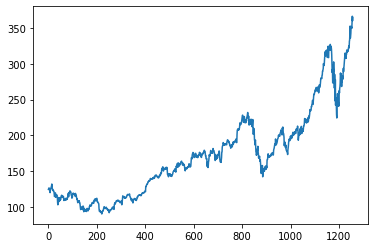

In [55]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.12379159]
 [0.12703212]
 [0.13128643]
 ...
 [1.        ]
 [0.9765741 ]
 [0.99388102]]


In [57]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [58]:
training_size

817

In [59]:
test_size

441

In [60]:
train_data

array([[0.12379159],
       [0.12703212],
       [0.13128643],
       [0.13070712],
       [0.12911402],
       [0.1279916 ],
       [0.11669503],
       [0.10764329],
       [0.11926572],
       [0.12788298],
       [0.12770194],
       [0.13208299],
       [0.13820196],
       [0.14222093],
       [0.15109164],
       [0.14631232],
       [0.12628987],
       [0.12607263],
       [0.12368297],
       [0.11741917],
       [0.11962779],
       [0.11821572],
       [0.11597089],
       [0.11209674],
       [0.10174155],
       [0.08798291],
       [0.09073464],
       [0.08975705],
       [0.09116912],
       [0.10637605],
       [0.08381911],
       [0.09015533],
       [0.08982947],
       [0.09276223],
       [0.09710706],
       [0.0947174 ],
       [0.08932257],
       [0.08077773],
       [0.05583113],
       [0.04627249],
       [0.04851733],
       [0.07006047],
       [0.08175531],
       [0.08309497],
       [0.081176  ],
       [0.06292769],
       [0.07965531],
       [0.072

In [61]:
import numpy
# convert array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [62]:
time_step = 100
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [63]:
X_train

array([[0.12379159, 0.12703212, 0.13128643, ..., 0.07965531, 0.08629929,
        0.08454325],
       [0.12703212, 0.13128643, 0.13070712, ..., 0.08629929, 0.08454325,
        0.09757775],
       [0.13128643, 0.13070712, 0.12911402, ..., 0.08454325, 0.09757775,
        0.10297259],
       ...,
       [0.26061769, 0.27126254, 0.28516601, ..., 0.4833629 , 0.46178355,
        0.46308701],
       [0.27126254, 0.28516601, 0.31221261, ..., 0.46178355, 0.46308701,
        0.4635577 ],
       [0.28516601, 0.31221261, 0.31337123, ..., 0.46308701, 0.4635577 ,
        0.46956805]])

In [64]:
print(X_train.shape)

(716, 100)


In [65]:
print(X_test)

[[0.47738875 0.47098012 0.48738187 ... 0.29132119 0.28994533 0.29179188]
 [0.47098012 0.48738187 0.49024222 ... 0.28994533 0.29179188 0.29577465]
 [0.48738187 0.49024222 0.49574568 ... 0.29179188 0.29577465 0.29226257]
 ...
 [0.84724284 0.84554111 0.79354792 ... 0.9459068  0.9464137  0.9391361 ]
 [0.84554111 0.79354792 0.79047033 ... 0.9464137  0.9391361  0.97226547]
 [0.79354792 0.79047033 0.82736522 ... 0.9391361  0.97226547 1.        ]]


In [66]:
print(X_test.shape)

(340, 100)


In [67]:
print(y_test.shape)

(340,)


In [68]:
print(y_train.shape)

(716,)


In [69]:
#time_step = 101
#X_train,y_train = create_dataset(train_data,time_step)
#X_test,y_test = create_dataset(test_data,time_step)

In [70]:
print(X_test.shape)

(340, 100)


In [71]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [72]:
# creating a stack LSTM Model #
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [73]:
import tensorflow as tf

In [74]:
tf.__version__

'2.2.0'

In [75]:
from tensorflow import keras

In [76]:
model = keras.Sequential()

In [77]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
Total params: 10,400
Trainable params: 10,400
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.add(LSTM(50,return_sequences=True))

In [80]:
model.add(LSTM(50))

In [81]:
model.add(Dense(1))

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


RuntimeError: ignored

In [86]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [87]:
print(train_predict)

[[ 5.46292402e-04]
 [ 5.81176078e-04]
 [ 6.04848145e-04]
 [ 6.16265170e-04]
 [ 6.17852900e-04]
 [ 6.11822121e-04]
 [ 6.01166743e-04]
 [ 5.88624796e-04]
 [ 5.75780112e-04]
 [ 5.64359012e-04]
 [ 5.55996783e-04]
 [ 5.51858102e-04]
 [ 5.49107732e-04]
 [ 5.46320283e-04]
 [ 5.43129456e-04]
 [ 5.41370653e-04]
 [ 5.41525660e-04]
 [ 5.45291579e-04]
 [ 5.53154328e-04]
 [ 5.65322116e-04]
 [ 5.79666637e-04]
 [ 5.95279969e-04]
 [ 6.12580858e-04]
 [ 6.29148388e-04]
 [ 6.42358034e-04]
 [ 6.49127178e-04]
 [ 6.48379850e-04]
 [ 6.41067338e-04]
 [ 6.26754423e-04]
 [ 6.07079302e-04]
 [ 5.85258356e-04]
 [ 5.63026406e-04]
 [ 5.43085916e-04]
 [ 5.27624798e-04]
 [ 5.19678695e-04]
 [ 5.17908076e-04]
 [ 5.17864130e-04]
 [ 5.14678424e-04]
 [ 5.07756311e-04]
 [ 4.94940323e-04]
 [ 4.77631227e-04]
 [ 4.57283342e-04]
 [ 4.34611691e-04]
 [ 4.10510576e-04]
 [ 3.81195481e-04]
 [ 3.47818917e-04]
 [ 3.11875658e-04]
 [ 2.80836335e-04]
 [ 2.57122389e-04]
 [ 2.37723172e-04]
 [ 2.21337221e-04]
 [ 2.08651734e-04]
 [ 1.9768331

In [88]:
print(test_predict)

[[0.00157805]
 [0.00163777]
 [0.00169471]
 [0.00174746]
 [0.00179441]
 [0.00183481]
 [0.00186897]
 [0.00189805]
 [0.00192351]
 [0.0019456 ]
 [0.00196475]
 [0.00198195]
 [0.00199874]
 [0.00201628]
 [0.00203323]
 [0.00204635]
 [0.00205436]
 [0.00205769]
 [0.00205734]
 [0.00205467]
 [0.00205185]
 [0.00205205]
 [0.00205646]
 [0.0020642 ]
 [0.00207805]
 [0.00210065]
 [0.00213302]
 [0.00217328]
 [0.00221884]
 [0.00226662]
 [0.00231372]
 [0.00235747]
 [0.0023967 ]
 [0.0024317 ]
 [0.00246307]
 [0.00249094]
 [0.00251706]
 [0.0025428 ]
 [0.00257029]
 [0.00260062]
 [0.00263381]
 [0.00266937]
 [0.00270486]
 [0.00273904]
 [0.00277169]
 [0.002802  ]
 [0.00283069]
 [0.00285972]
 [0.00289062]
 [0.00292335]
 [0.0029596 ]
 [0.00299417]
 [0.00302592]
 [0.00305349]
 [0.00307857]
 [0.00310503]
 [0.00313356]
 [0.00316391]
 [0.00319551]
 [0.00323086]
 [0.00326568]
 [0.00329382]
 [0.00331112]
 [0.00331572]
 [0.00330899]
 [0.00329005]
 [0.00326072]
 [0.0032233 ]
 [0.00317903]
 [0.00312868]
 [0.00307279]
 [0.00

In [89]:
train_predict = scaler.inverse_transform(train_predict)

In [90]:
print(train_predict)

[[90.49088 ]
 [90.50051 ]
 [90.50706 ]
 [90.51021 ]
 [90.51064 ]
 [90.50898 ]
 [90.506035]
 [90.50257 ]
 [90.49902 ]
 [90.49587 ]
 [90.49356 ]
 [90.492424]
 [90.49165 ]
 [90.49089 ]
 [90.49001 ]
 [90.489525]
 [90.48956 ]
 [90.4906  ]
 [90.492775]
 [90.49613 ]
 [90.5001  ]
 [90.50442 ]
 [90.509186]
 [90.51376 ]
 [90.51741 ]
 [90.51928 ]
 [90.51907 ]
 [90.51706 ]
 [90.51311 ]
 [90.50767 ]
 [90.50164 ]
 [90.4955  ]
 [90.48999 ]
 [90.485725]
 [90.483536]
 [90.48304 ]
 [90.48303 ]
 [90.48215 ]
 [90.48024 ]
 [90.4767  ]
 [90.47192 ]
 [90.46629 ]
 [90.46003 ]
 [90.453384]
 [90.44528 ]
 [90.436066]
 [90.42614 ]
 [90.417564]
 [90.41102 ]
 [90.405655]
 [90.40113 ]
 [90.39762 ]
 [90.39459 ]
 [90.39165 ]
 [90.38921 ]
 [90.38716 ]
 [90.38534 ]
 [90.38378 ]
 [90.38257 ]
 [90.381546]
 [90.37993 ]
 [90.37713 ]
 [90.37364 ]
 [90.37    ]
 [90.36641 ]
 [90.36359 ]
 [90.36148 ]
 [90.35985 ]
 [90.35854 ]
 [90.35755 ]
 [90.35602 ]
 [90.353714]
 [90.35073 ]
 [90.34715 ]
 [90.34369 ]
 [90.34114 ]
 [90.33994 ]

In [91]:
test_predict = scaler.inverse_transform(test_predict)

In [92]:
print(tesst_predict)

NameError: ignored

In [93]:
print(test_predict)

[[90.77584 ]
 [90.792336]
 [90.80806 ]
 [90.82263 ]
 [90.8356  ]
 [90.846756]
 [90.856186]
 [90.86422 ]
 [90.87125 ]
 [90.87736 ]
 [90.882645]
 [90.88739 ]
 [90.89204 ]
 [90.89688 ]
 [90.90156 ]
 [90.90518 ]
 [90.907394]
 [90.90832 ]
 [90.90822 ]
 [90.90748 ]
 [90.9067  ]
 [90.90676 ]
 [90.90797 ]
 [90.91011 ]
 [90.91393 ]
 [90.92018 ]
 [90.92912 ]
 [90.94025 ]
 [90.95282 ]
 [90.96603 ]
 [90.97903 ]
 [90.99111 ]
 [91.001945]
 [91.011604]
 [91.02027 ]
 [91.02797 ]
 [91.03519 ]
 [91.04229 ]
 [91.04989 ]
 [91.058266]
 [91.06743 ]
 [91.07725 ]
 [91.08705 ]
 [91.0965  ]
 [91.105515]
 [91.113884]
 [91.1218  ]
 [91.12982 ]
 [91.13836 ]
 [91.1474  ]
 [91.15741 ]
 [91.16696 ]
 [91.17573 ]
 [91.18334 ]
 [91.19027 ]
 [91.19758 ]
 [91.20546 ]
 [91.21384 ]
 [91.22257 ]
 [91.23233 ]
 [91.24194 ]
 [91.249725]
 [91.2545  ]
 [91.25577 ]
 [91.25391 ]
 [91.24868 ]
 [91.24058 ]
 [91.23024 ]
 [91.21802 ]
 [91.20411 ]
 [91.188675]
 [91.17185 ]
 [91.15423 ]
 [91.135994]
 [91.11656 ]
 [91.09569 ]
 [91.07351 ]